# NI-VSM Domácí úkol 1

### Jakub Kučera - kucerj56

In [1]:
K = 11
L = 6
X = 19  # ((K*L*23) % 20) + 1
Y = 2  # ((X + ((K*5 + L*7) % 19)) % 20) + 1
file_1_path = "hw1-source/019.txt"
file_2_path = "hw1-source/002.txt"

In [2]:
from collections import Counter
import math
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import numpy as np

### 1. (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů včetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Komentare v kodu by u teto ulohy mely byt odstatecne.

Pravdepodovnost vyskytu znaku x se normalne pocita
P(x) = #x / (delka textu)
kde #x je pocet vyskytu znaku x v textu

In [3]:
def calc_char_probabilities(filename: str):
    with open(filename) as f1:
        file_contents = f1.read()
    # separate the first line with the book info from rest of the text
    info, text = file_contents.split('\n')
    # Split the text into a list of separate characters
    list_of_characters = [*text]
    total_characters_count = len(list_of_characters)
    # get number of occurrences for each character
    char_counter = Counter(list_of_characters)

    # calculate probabilities of occurrences of characters
    char_probabilities = {}
    for c, n in sorted(char_counter.items()):
        char_probabilities[c] = n/total_characters_count
    # display(char_probabilities)
    return char_probabilities

In [4]:
def plot_char_probs(char_probabilities: dict[str, float], name: str):
    # add date to plot
    plt.scatter(char_probabilities.keys(), char_probabilities.values())
    # set Y axis to be in percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.xlabel("Characters")
    plt.ylabel("Probability of occurence")
    plt.title(name)
    plt.show()

File: hw1-source/019.txt


{' ': 0.17706755528627688,
 'a': 0.0671008785216601,
 'b': 0.014389578915480157,
 'c': 0.024083611026961528,
 'd': 0.02696152681005756,
 'e': 0.10133292941532869,
 'f': 0.014541048167222055,
 'g': 0.014389578915480157,
 'h': 0.049378976067858224,
 'i': 0.06437443199030597,
 'j': 0.0016661617691608604,
 'k': 0.004392608300514996,
 'l': 0.03620115116631324,
 'm': 0.021205695243865494,
 'n': 0.05786125416540442,
 'o': 0.05543774613753408,
 'p': 0.02226598000605877,
 'q': 0.001514692517418964,
 'r': 0.04513783701908512,
 's': 0.05664950015146925,
 't': 0.07376552559830354,
 'u': 0.023629203271735837,
 'v': 0.008330808845804302,
 'w': 0.016964556195092396,
 'x': 0.0031808542865798244,
 'y': 0.016510148439866708,
 'z': 0.0016661617691608604}

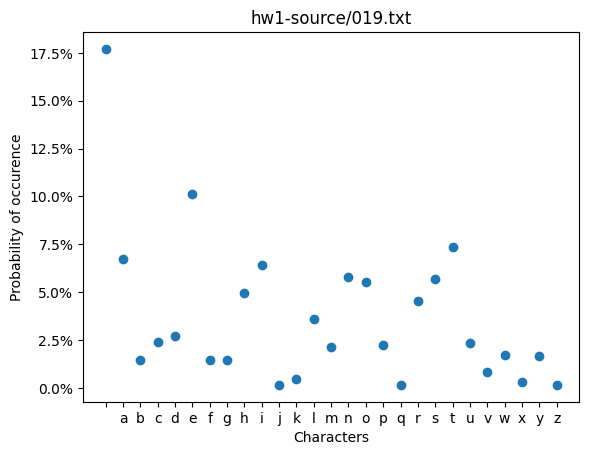

File: hw1-source/002.txt


{' ': 0.20067621320604614,
 'a': 0.06821797931583135,
 'b': 0.013325377883850438,
 'c': 0.0147175815433572,
 'd': 0.03599840891010342,
 'e': 0.09506762132060462,
 'f': 0.015115354017501989,
 'g': 0.01690533015115354,
 'h': 0.05588703261734288,
 'i': 0.05250596658711217,
 'j': 0.000994431185361973,
 'k': 0.009347653142402546,
 'l': 0.03420843277645187,
 'm': 0.0147175815433572,
 'n': 0.052307080350039774,
 'o': 0.06225139220365951,
 'p': 0.01213206046141607,
 'q': 0.0003977724741447892,
 'r': 0.042362768496420046,
 's': 0.04892601431980907,
 't': 0.08313444709626094,
 'u': 0.022871917263325377,
 'v': 0.006762132060461416,
 'w': 0.02605409705648369,
 'x': 0.0001988862370723946,
 'y': 0.014518695306284805,
 'z': 0.0003977724741447892}

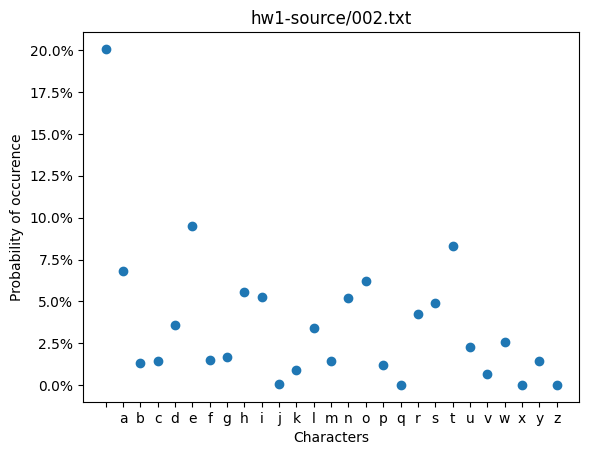

In [5]:
print(f"File: {file_1_path}")
file_1_chars_prob = calc_char_probabilities(file_1_path)
display(file_1_chars_prob)
plot_char_probs(file_1_chars_prob, file_1_path)
print(f"File: {file_2_path}")
file_2_chars_prob = calc_char_probabilities(file_2_path)
display(file_2_chars_prob)
plot_char_probs(file_2_chars_prob, file_2_path)
# print(file_1_chars_prob)

Kontrola jestli oba texty obsahuji stejne znaky (dulezite na pozdejsi ukoly)

In [6]:
file_1_chars_prob.keys() == file_2_chars_prob.keys()

True

### 2. (1b) Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.

Pro vypocet entropie jednodusse doplnime do vzorecku H(X) = −	$\sum_{x∈X} p(x) * log p(x)$  .

In [7]:
def calc_entropy(char_probabilities: dict[str, float]) -> float:
    entropy = 0.0
    for _, p in char_probabilities.items():
        entropy -= p * math.log(p, 2)
    return entropy

In [8]:
file_1_entropy = calc_entropy(file_1_chars_prob)
print(f"Characters in '{file_1_path}' have entropy of {file_1_entropy}")
file_2_entropy = calc_entropy(file_2_chars_prob)
print(f"Characters in '{file_2_path}' have entropy of {file_2_entropy}")

# I could have also used
# entropy(np.array([*file_2_chars_prob.values()]), base=2)

Characters in 'hw1-source/019.txt' have entropy of 4.127313497678558
Characters in 'hw1-source/002.txt' have entropy of 4.037379295589636


### 3. (2b) Nalezněte optimální binární instantní kód C pro kódování znaků prvního z textů.

Z prednasek vime, ze Huffmanuv kod je optimalni a instantni. Nema cenu rucne vypisovat prubeh algoritmu pro ~27 znaku, naimplementuju tedy algoritmus pro tvorbu Huffmanova kodu podle [handoutu z courses](https://courses.fit.cvut.cz/NI-VSM/lectures/files/NI-VSM-Lec-06-Handout.pdf)

In [9]:
def rec_assign_code(letters: list | str, prefix: str) -> dict[str, str]:
    # if this is only a character and not a collection of characters
    if isinstance(letters, str):
        return {letters: prefix}
    # split the collection of characters into 2 parts (same way as they were originally merged together)
    l1, l2 = letters
    # recursively call this function. Prefixes the less probable one with a '1' and the more probable one with '0'.
    d1 = rec_assign_code(l1, prefix+'1')
    d2 = rec_assign_code(l2, prefix+'0')

    # merge dictionaries with mapped letters to codes
    return d1 | d2

In [10]:
def create_bin_huffman_code(chars_probs: dict[str, float]):
    # (cannot use dict, since keys have to be hashable, and sets/lists are not and I am not going to bother with some class based approach)
    tmp_merging_chars = []

    # convert a dictionary with characters and their probabilities into a list of tuples
    for k, v in chars_probs.items():
        tmp_merging_chars.append((k, v))

    # print(tmp_merging_chars)

    # merge groups of characters together by lowest probabilities, until it's a 1 big group
    while len(tmp_merging_chars) > 1: # > 2:
        tmp_merging_chars.sort(key=lambda x: x[1], reverse=True)
        l1, p1 = tmp_merging_chars.pop()
        l2, p2 = tmp_merging_chars.pop()
        tmp_merging_chars.append(((l1, l2) , p1+p2))
    # print(tmp_merging_chars)

    ls, p = tmp_merging_chars[0]
    assert p == 1.0

    # call a recursive function which will split groups of characters and prefix the less probable one with a '1' and the more probable one with '0'. This will end up creating the huffman code for given input
    coding_map = rec_assign_code(ls, '')

    # display(coding_map)
    return coding_map

In [11]:
coding_map_1 = create_bin_huffman_code(file_1_chars_prob)
display(coding_map_1)

{'r': '1111',
 'u': '11101',
 'c': '11100',
 'e': '110',
 'h': '1011',
 'o': '1010',
 'd': '10011',
 'g': '100101',
 'b': '100100',
 's': '1000',
 'n': '0111',
 'i': '0110',
 'a': '0101',
 'f': '010011',
 'y': '010010',
 'l': '01000',
 't': '0011',
 'w': '001011',
 'v': '0010101',
 'j': '001010011',
 'q': '0010100101',
 'z': '0010100100',
 'x': '001010001',
 'k': '001010000',
 'm': '001001',
 'p': '001000',
 ' ': '000'}

Jelikoz byl tento kod vytvoren algoritmem pro Huffmanuv kod, muzeme predpokladat, ze je optimalni a instantni (instantnost take overena popularnim algoritmem "Kouknu a vidim" :) )

Jentak pro jistotu si overim nutnou podminku optimalniho kodu:
H<sub>D</sub>(X) ≤ L(C<sup>*</sup>) < H<sub>D</sub>(X) + 1
jiz vime, ze H<sub>D</sub>(X) = 4.127313497678558
takze H<sub>D</sub>(X)+1 = 5.127313497678558
ted jeste musim zjistit L(C<sup>*</sup>), kterou si spocitam pres L(C) = $\sum_{x∈X} l(x)p(x)$

In [12]:
def calc_expected_length(codes, probabilities) -> float:
    assert len(codes) == len(probabilities)
    expected_length = 0.0
    for l, c in codes.items():
        expected_length += len(c) * probabilities[l]
    return expected_length

In [13]:
calc_expected_length(coding_map_1, file_1_chars_prob)

4.163283853377765

`4.163283853377765` opravdu splnuje tuto nutnou podminku

### (2b) Pro každý text zvlášť spočtěte střední délku kódu C a porovnejte ji s entropií rozdělení znaků. Je kód C optimální i pro druhý text?

Pro 1. text jsem toto provedl jiz v minulem bodu.
Provedu to tedy pro 2. text.

Zkontroluju opet nutnou podminku optimality H<sub>D</sub>(X) ≤ L(C<sup>*</sup>) < H<sub>D</sub>(X) + 1

In [14]:
calc_expected_length(coding_map_1, file_2_chars_prob)

4.115354017501988

a opravdu `4.037379295589636` <= `4.115354017501988` < `5.037379295589636`

Avsak toto neznamena ze se opravdu jedna o optimalni kod. Pokud existuje jiny kod pro 2. text s mensi stredni delkou, potom (ten puvodni) neni optimalni (pro 2. text). Jelikoz jsem mam implementovany algoritmus pro Huffmanovo kodovani, tak ho spustim na 2. text.

In [15]:
coding_map_2 = create_bin_huffman_code(file_2_chars_prob)
display(coding_map_2)

{' ': '11',
 's': '1011',
 'n': '1010',
 'i': '1001',
 'w': '10001',
 'y': '100001',
 'm': '100000',
 'h': '0111',
 'o': '0110',
 'c': '010111',
 'f': '010110',
 'l': '01010',
 'a': '0100',
 'g': '001111',
 'q': '0011101111',
 'x': '00111011101',
 'z': '00111011100',
 'j': '001110110',
 'v': '00111010',
 'k': '0011100',
 'd': '00110',
 't': '0010',
 'r': '00011',
 'u': '000101',
 'p': '0001001',
 'b': '0001000',
 'e': '0000'}

In [16]:
calc_expected_length(coding_map_2, file_2_chars_prob)

4.077963404932379

Aha, tento novy kod ma kratsi stredni delku, tudiz puvodni kod neni optimalni pro 2. text